Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Load Dataset

In [2]:

# URL for the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Load the dataset directly from the URL
data = pd.read_csv(url)

# Preview the first few rows
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


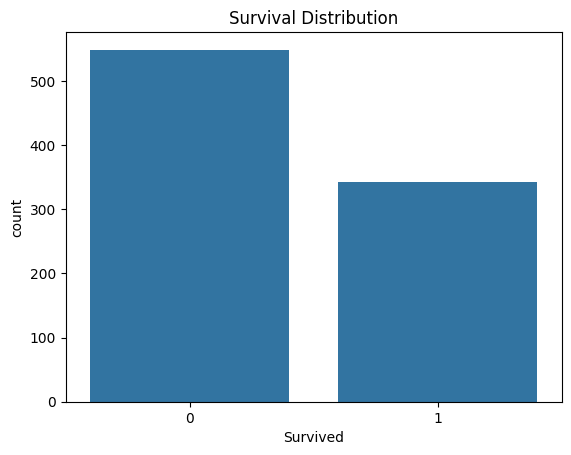

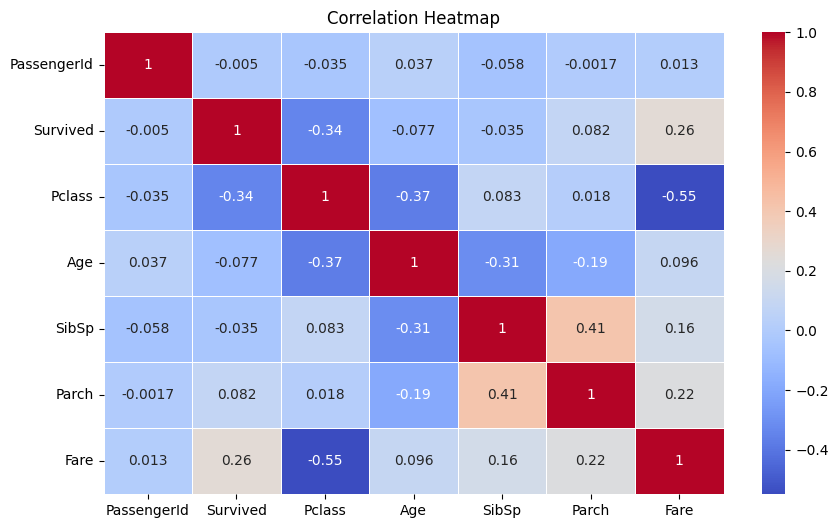

In [3]:
# General info about the dataset
data.info()

# Summary statistics for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()

# Visualizing the distribution of 'Survived'
sns.countplot(data=data, x='Survived')
plt.title('Survival Distribution')
plt.show()

# Select only numeric columns for correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])

# Visualize the correlation matrix for numeric columns only
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Data Cleaning

In [4]:
# Fill missing values
# For Age, we will fill with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# For Embarked, we will fill missing values with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop columns that won't be useful for modeling
data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

# Check if there are any more missing values
data.isnull().sum()


<ipython-input-4-286a7661146f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-4-286a7661146f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


 Data Preprocessing

In [5]:
# Encode categorical columns
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Check the transformed data
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


Split the Data into Training and Test Sets

In [6]:
# Define features and target variable
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
X_train.shape, X_test.shape


((712, 8), (179, 8))

Modeling

In [7]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Model Evaluation

Accuracy: 0.80
Confusion Matrix:
[[88 17]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



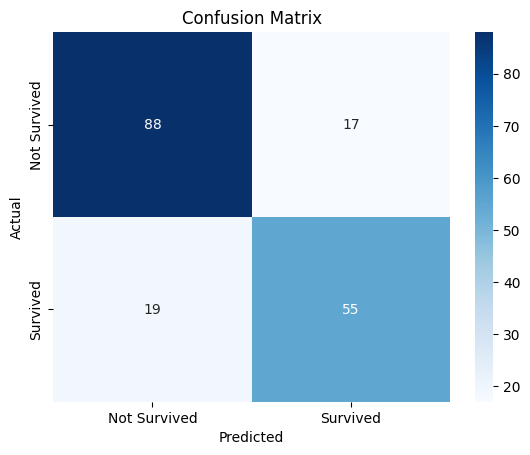

In [8]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Visualize the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [9]:
# Summary of findings
print("The model's accuracy on the test set is: ", accuracy)
print("From the classification report, we can see that the model performed reasonably well in predicting survival rates.")
print("Future work could involve tuning the model or testing other algorithms.")


The model's accuracy on the test set is:  0.7988826815642458
From the classification report, we can see that the model performed reasonably well in predicting survival rates.
Future work could involve tuning the model or testing other algorithms.


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [11]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Load the Titanic dataset directly from the URL
data = pd.read_csv(url)

# Preview the first few rows
data.head()

# Check the column names
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
# Data Cleaning: Handle missing values with KNN imputation
imputer = KNNImputer(n_neighbors=5)
data[['Age', 'Fare']] = imputer.fit_transform(data[['Age', 'Fare']])

# Feature Engineering: Create new feature - FamilySize (SibSp + Parch)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1  # Including the passenger themselves

# Feature Engineering: Log Transformation for skewed 'Fare' column
data['Fare'] = np.log1p(data['Fare'])

# Feature Selection: Drop irrelevant features
data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')

# Convert 'Sex' to numeric (Binary Encoding)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Check the cleaned dataset
data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,0,22.0,1,0,2.110213,S,2
1,2,1,1,1,38.0,1,0,4.280593,C,2
2,3,1,3,1,26.0,0,0,2.188856,S,1
3,4,1,1,1,35.0,1,0,3.990834,S,2
4,5,0,3,0,35.0,0,0,2.202765,S,1


In [14]:
print(X_train.dtypes)


PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
FamilySize       int64
dtype: object


In [15]:
# Ensure all categorical variables are encoded
X = pd.get_dummies(X, drop_first=True)


In [16]:
print(X_train.dtypes)

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
FamilySize       int64
dtype: object


In [17]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# One-hot encode any remaining categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model performance using accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


Accuracy: 0.8212290502793296
Precision: 0.8088235294117647
Recall: 0.7432432432432432
F1 Score: 0.7746478873239436


In [19]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train the model using the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_best = best_rf_model.predict(X_test_scaled)
print(f"Accuracy with best model: {accuracy_score(y_test, y_pred_best)}")
print(f"Precision with best model: {precision_score(y_test, y_pred_best)}")
print(f"Recall with best model: {recall_score(y_test, y_pred_best)}")
print(f"F1 Score with best model: {f1_score(y_test, y_pred_best)}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy with best model: 0.8268156424581006
Precision with best model: 0.8412698412698413
Recall with best model: 0.7162162162162162
F1 Score with best model: 0.7737226277372263


In [20]:
# Perform cross-validation to get more reliable performance estimates
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5)

# Print average cross-validation score
print(f"Average Cross-Validation Score: {cv_scores.mean()}")


Average Cross-Validation Score: 0.8314192849404117


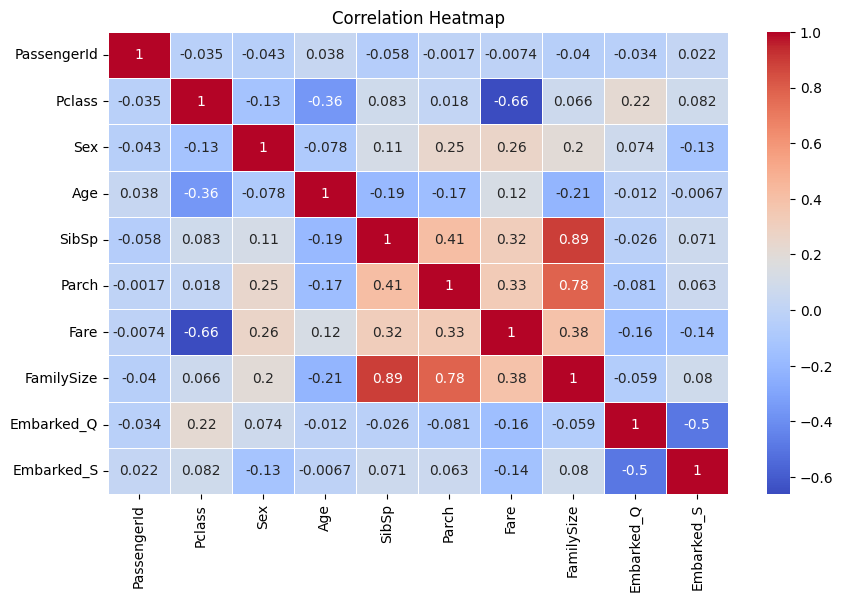

In [21]:
# Visualize the correlation matrix for the numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [22]:
# Final evaluation of the best model
final_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Final Accuracy: {final_accuracy}")


Final Accuracy: 0.8268156424581006


In [30]:
!git config --global user.name "GojoSatoru07"
!git config --global user.email "mohammadarafat3371@gmail.com"
!git branch


In [31]:
!git init
!git add .
!git commit -m "Initial commit - Titanic project"
!git remote add origin https://github.com/GojoSatoru07/Titanic-Survival-Prediction-project.git
!git branch -M main
!git push -u origin main

Reinitialized existing Git repository in /content/.git/
[main (root-commit) fc6d35b] Initial commit - Titanic project
 21 files changed, 51025 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.04.24/18.19.17.922226.log
 create mode 100644 .config/logs/2025.04.24/18.19.38.522066.log
 create mode 100644 .config/logs/2025.04.24/18.19.46.929623.log
 create mode 100644 .config/logs/2025.04.24/18.19.48.089267.log
 create mode 100644 .config/logs/2025.04.24/18.19.56.709493.log
 create mode 100644 .config/logs/2025.04.24/18.19.5